# Riesgo de descenso y probabilidad de ascenso en LaLiga 

Se quiere conocer la probabilidad de que un club descienda a Segunda División. Sin embargo, no se disponen de datos históricos, por lo que haremos uso del web scrapping para obtenerlos e implementar un modelo

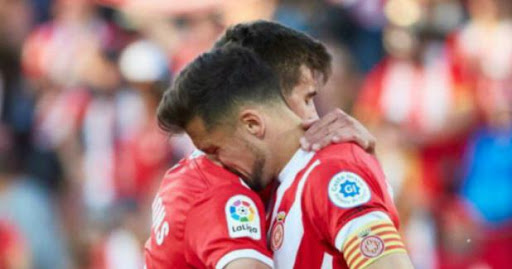

Para el modelo de **descenso** se utilizarán estas dos webs:  
1 - [Información de los clubes en cada temporada](https://www.transfermarkt.es/laliga/startseite/wettbewerb/ES1/plus/?saison_id=2020)  
2 - [Clasificaciones históricas](https://www.transfermarkt.es/laliga/tabelle/wettbewerb/ES1?saison_id=2020)

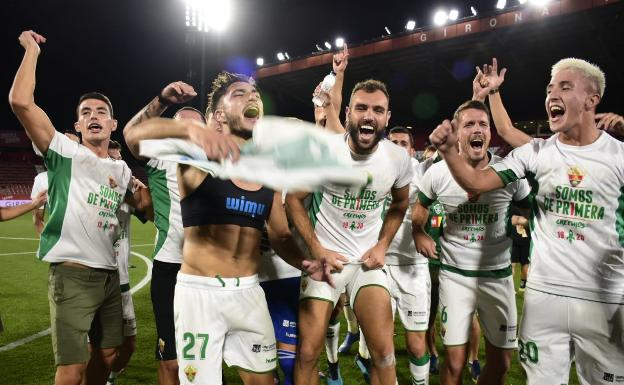

Para el modelo de **ascensos** no utilizaremos Machine Learning ("*its not always Machine Learning*"), sino que haremos una aproximación basada en la probabilidad histórica de que un club ascienda, basándonos en los años que lleva en Segunda División. Dicho de otro modo:  

¿Cuántos clubes que llevan 1 año en Segunda han ascendido?  
¿Cuántos clubes que llevan 2 años en Segunda han ascendido?  
etc.

### 1. Modelo de descenso

Con este código de web scraping se obtiene la información de los equipos en la temporada 2020-2021. 

In [1]:
import pandas as pd
import numpy as np
import requests
import time # time.sleep(0.5)

clubes = pd.DataFrame()

url = 'https://www.transfermarkt.es/laliga/startseite/wettbewerb/ES1/plus/?saison_id=2020'

tables = pd.read_html(requests.get(url,
                               headers={'User-agent': 'Mozilla/5.0'}).text,
                  attrs={"class":"items"})
df = tables[0]
df

,Club,Club.1,name,Equipo,Edad,Extranjeros,ø-Valor de mercado,Valor de mercado total
0,NaN,FC Barcelona,33.0,250,21,"24,77 mill. €","817,50 mill. €",NaN
1,NaN,Real Madrid CF,37.0,248,17,"21,28 mill. €","787,30 mill. €",NaN
2,NaN,Atlético de Madrid,39.0,249,21,"19,82 mill. €","773,10 mill. €",NaN
3,NaN,Sevilla FC,38.0,256,17,"11,01 mill. €","418,25 mill. €",NaN
4,NaN,Real Sociedad,38.0,247,6,"10,70 mill. €","406,60 mill. €",NaN
5,NaN,Villarreal CF,36.0,259,13,"8,13 mill. €","292,60 mill. €",NaN
6,NaN,Valencia CF,35.0,247,20,"7,97 mill. €","278,85 mill. €",NaN
7,NaN,Real Betis Balompié,33.0,268,12,"6,29 mill. €","207,70 mill. €",NaN
8,NaN,Athletic Club,32.0,259,1,"6,38 mill. €","204,15 mill. €",NaN
9,NaN,Getafe CF,33.0,254,19,"5,15 mill. €","170,10 mill. €",NaN


Modifica el código anterior para generar un único dataframe con toda la información desde la temporada 2005-06

In [10]:
clubes = pd.DataFrame()

for temporada in range(2005,2021):
    url = 'https://www.transfermarkt.es/laliga/startseite/wettbewerb/ES1/plus/?saison_id=' + str(temporada)
    tables = pd.read_html(requests.get(url,
                               headers={'User-agent': 'Mozilla/5.0'}).text,
                  attrs={"class":"items"})
    df = tables[0]
    df['Temporada'] = temporada
    clubes = pd.concat([clubes,df],axis=0)
    time.sleep(0.5)

In [11]:
clubes

,Club,Club.1,name,Equipo,Edad,Extranjeros,ø-Valor de mercado,Valor de mercado total,Temporada
0,NaN,FC Barcelona,34.0,249,15,"9,63 mill. €","327,50 mill. €",NaN,2005
1,NaN,Real Madrid CF,36.0,250,13,"7,82 mill. €","281,60 mill. €",NaN,2005
2,NaN,Valencia CF,31.0,272,14,"6,83 mill. €","211,75 mill. €",NaN,2005
3,NaN,Atlético de Madrid,31.0,240,8,"4,33 mill. €","134,15 mill. €",NaN,2005
4,NaN,RC Deportivo de La Coruña,33.0,273,8,"4,05 mill. €","133,65 mill. €",NaN,2005
...,...,...,...,...,...,...,...,...,...
16,NaN,SD Huesca,34.0,265,8,"1,89 mill. €","64,10 mill. €",NaN,2020
17,NaN,Real Valladolid CF,39.0,269,9,"1,62 mill. €","63,05 mill. €",NaN,2020
18,NaN,Cádiz CF,41.0,272,16,"1,16 mill. €","47,65 mill. €",NaN,2020
19,NaN,Elche CF,42.0,267,14,"1,09 mill. €","45,65 mill. €",NaN,2020


Limpia el dataframe y obtén uno como este
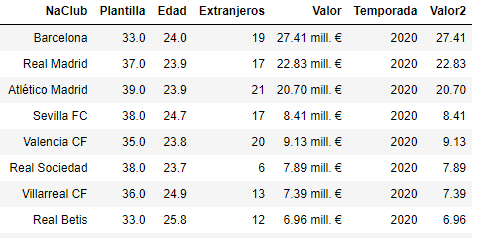

In [28]:
clubes1 = clubes.iloc[:,[1,2,3,4,5,8]]
clubes1.columns = ['NaClub','Plantilla','Edad','Extranjeros','Valor','Temporada']
clubes1 = clubes1.loc[~clubes1.Plantilla.isna()]
clubes1['ValorM'] = np.where(clubes1.Valor.str.contains('mil '),1000,1)
clubes1['Valor'] = clubes1.Valor.str.replace(',','.')
clubes1['Valor2'] = clubes1.Valor.str.extract('(^\d*.\d*)').astype('float')
clubes1['Valor2'] = clubes1['Valor2']/clubes1['ValorM']
clubes1['Edad'] = clubes1['Edad']/10
clubes1.loc[clubes1.Temporada==2020]

,NaClub,Plantilla,Edad,Extranjeros,Valor,Temporada,ValorM,Valor2
0,FC Barcelona,33.0,25.0,21,24.77 mill. €,2020,1,24.77
1,Real Madrid CF,37.0,24.8,17,21.28 mill. €,2020,1,21.28
2,Atlético de Madrid,39.0,24.9,21,19.82 mill. €,2020,1,19.82
3,Sevilla FC,38.0,25.6,17,11.01 mill. €,2020,1,11.01
4,Real Sociedad,38.0,24.7,6,10.70 mill. €,2020,1,10.70
5,Villarreal CF,36.0,25.9,13,8.13 mill. €,2020,1,8.13
6,Valencia CF,35.0,24.7,20,7.97 mill. €,2020,1,7.97
7,Real Betis Balompié,33.0,26.8,12,6.29 mill. €,2020,1,6.29
8,Athletic Club,32.0,25.9,1,6.38 mill. €,2020,1,6.38
9,Getafe CF,33.0,25.4,19,5.15 mill. €,2020,1,5.15


Calcula, para cada temporada, el valor relativo de cada club con respecto al valor máximo.  
Primero, crea un dataframe con los valores máximos de cada temporada  
A continuación, normaliza por cada club y temporada, su valor con respecto al máximo  

In [32]:
dfVal = clubes1[['Temporada','Valor2']].groupby('Temporada',as_index=False).max()
dfVal.columns = ['Temporada','VMax']
dfVal

,Temporada,VMax
0,2005,9.63
1,2006,11.45
2,2007,13.68
3,2008,12.51
4,2009,16.63
5,2010,17.28
6,2011,17.66
7,2012,19.55
8,2013,19.17
9,2014,19.48


In [33]:
clubes1 = clubes1.merge(dfVal,how='left',left_on='Temporada',right_on='Temporada')
clubes1

,NaClub,Plantilla,Edad,Extranjeros,Valor,Temporada,ValorM,Valor2,VMax
0,FC Barcelona,34.0,24.9,15,9.63 mill. €,2005,1,9.63,9.63
1,Real Madrid CF,36.0,25.0,13,7.82 mill. €,2005,1,7.82,9.63
2,Valencia CF,31.0,27.2,14,6.83 mill. €,2005,1,6.83,9.63
3,Atlético de Madrid,31.0,24.0,8,4.33 mill. €,2005,1,4.33,9.63
4,RC Deportivo de La Coruña,33.0,27.3,8,4.05 mill. €,2005,1,4.05,9.63
...,...,...,...,...,...,...,...,...,...
315,Deportivo Alavés,35.0,25.6,10,2.28 mill. €,2020,1,2.28,24.77
316,SD Huesca,34.0,26.5,8,1.89 mill. €,2020,1,1.89,24.77
317,Real Valladolid CF,39.0,26.9,9,1.62 mill. €,2020,1,1.62,24.77
318,Cádiz CF,41.0,27.2,16,1.16 mill. €,2020,1,1.16,24.77


In [34]:
clubes1['ValorRel'] = clubes1['Valor2']/clubes1['VMax']
clubes1

,NaClub,Plantilla,Edad,Extranjeros,Valor,Temporada,ValorM,Valor2,VMax,ValorRel
0,FC Barcelona,34.0,24.9,15,9.63 mill. €,2005,1,9.63,9.63,1.000000
1,Real Madrid CF,36.0,25.0,13,7.82 mill. €,2005,1,7.82,9.63,0.812046
2,Valencia CF,31.0,27.2,14,6.83 mill. €,2005,1,6.83,9.63,0.709242
3,Atlético de Madrid,31.0,24.0,8,4.33 mill. €,2005,1,4.33,9.63,0.449637
4,RC Deportivo de La Coruña,33.0,27.3,8,4.05 mill. €,2005,1,4.05,9.63,0.420561
...,...,...,...,...,...,...,...,...,...,...
315,Deportivo Alavés,35.0,25.6,10,2.28 mill. €,2020,1,2.28,24.77,0.092047
316,SD Huesca,34.0,26.5,8,1.89 mill. €,2020,1,1.89,24.77,0.076302
317,Real Valladolid CF,39.0,26.9,9,1.62 mill. €,2020,1,1.62,24.77,0.065402
318,Cádiz CF,41.0,27.2,16,1.16 mill. €,2020,1,1.16,24.77,0.046831


Con este código de web scraping, se obtiene la tabla de clasificación para la temporada 2020-21

In [35]:
url = 'https://www.transfermarkt.es/laliga/tabelle/wettbewerb/ES1?saison_id=2020'

general = pd.read_html(requests.get(url,headers={'User-agent': 'Mozilla/5.0'}).text)
df = general[3]
df

,#,Club,Club.1,Unnamed: 3,G,E,P,Goles,+/-,Pto.
0,1,NaN,Atlético Madrid,38,26,8,4,67:25,42,86
1,2,NaN,Real Madrid,38,25,9,4,67:28,39,84
2,3,NaN,FC Barcelona,38,24,7,7,85:38,47,79
3,4,NaN,Sevilla FC,38,24,5,9,53:33,20,77
4,5,NaN,Real Sociedad,38,17,11,10,59:38,21,62
5,6,NaN,Real Betis,38,17,10,11,50:50,0,61
6,7,NaN,Villarreal CF,38,15,13,10,60:44,16,58
7,8,NaN,RC Celta,38,14,11,13,55:57,-2,53
8,9,NaN,Athletic,38,11,13,14,46:42,4,46
9,10,NaN,Granada CF,38,13,7,18,47:65,-18,46


Modifica el código anterior para generar un único dataframe con toda la información desde la temporada 2005-06

In [43]:
clasif = pd.DataFrame()

for temporada in range(2005,2021):
    url = 'https://www.transfermarkt.es/laliga/tabelle/wettbewerb/ES1?saison_id=' + str(temporada)
    general = pd.read_html(requests.get(url,headers={'User-agent': 'Mozilla/5.0'}).text)
    df = general[3]
    df['Temporada'] = temporada
    clasif = pd.concat([clasif,df],axis=0)
    time.sleep(0.5)

In [44]:
clasif

,#,Club,Club.1,Unnamed: 3,G,E,P,Goles,+/-,Pto.,Temporada
0,1,NaN,FC Barcelona,38,25,7,6,80:35,45,82,2005
1,2,NaN,Real Madrid,38,20,10,8,70:40,30,70,2005
2,3,NaN,Valencia CF,38,19,12,7,58:33,25,69,2005
3,4,NaN,CA Osasuna,38,21,5,12,49:43,6,68,2005
4,5,NaN,Sevilla FC,38,20,8,10,54:39,15,68,2005
...,...,...,...,...,...,...,...,...,...,...,...
15,16,NaN,Dep. Alavés,38,9,11,18,36:57,-21,38,2020
16,17,NaN,Elche CF,38,8,12,18,34:55,-21,36,2020
17,18,NaN,SD Huesca,38,7,13,18,34:53,-19,34,2020
18,19,NaN,Real Valladolid,38,5,16,17,34:57,-23,31,2020


Limpia el dataframe y obtén uno como este
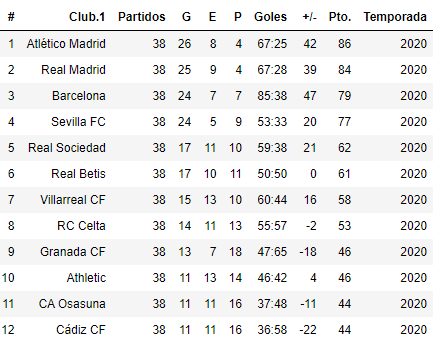

In [48]:
clasif1 = clasif.iloc[:,[0,2,3,4,5,6,7,8,9,10]]
clasif1.columns = ['#', 'Club.1', 'Partidos', 'G', 'E', 'P', 'Goles', '+/-', 'Pto.','Temporada']
clasif1

,#,Club.1,Partidos,G,E,P,Goles,+/-,Pto.,Temporada
0,1,FC Barcelona,38,25,7,6,80:35,45,82,2005
1,2,Real Madrid,38,20,10,8,70:40,30,70,2005
2,3,Valencia CF,38,19,12,7,58:33,25,69,2005
3,4,CA Osasuna,38,21,5,12,49:43,6,68,2005
4,5,Sevilla FC,38,20,8,10,54:39,15,68,2005
...,...,...,...,...,...,...,...,...,...,...
15,16,Dep. Alavés,38,9,11,18,36:57,-21,38,2020
16,17,Elche CF,38,8,12,18,34:55,-21,36,2020
17,18,SD Huesca,38,7,13,18,34:53,-19,34,2020
18,19,Real Valladolid,38,5,16,17,34:57,-23,31,2020


Une ambos dataframes (información de equipo + clasificación)

In [58]:
replaces = {'Real Madrid':'Real Madrid CF',
            'RC Celta':'RC Celta de Vigo',
            'RC Deportivo':'RC Deportivo de La Coruña',
            'Getafe':'Getafe CF',
            'Atlético Madrid':'Atlético de Madrid',
            'Athletic':'Athletic Club',
            'Real Betis':'Real Betis Balompié',
            'Racing':'Racing de Santander',
            'Dep. Alavés':'Deportivo Alavés',
            'Recreativo':'Recreativo de Huelva',
            'Gimnàstic':'Gimnàstic de Tarragona',
            'Real Valladolid':'Real Valladolid CF',
            'Real Murcia':'Real Murcia CF',
            'Real Sporting':'Sporting de Gijón'}

In [59]:
primera = clasif1.replace(replaces).merge(clubes1,how='left',left_on=['Club.1','Temporada'],
                       right_on=['NaClub','Temporada'])
primera

,#,Club.1,Partidos,G,E,P,Goles,+/-,Pto.,Temporada,NaClub,Plantilla,Edad,Extranjeros,Valor,ValorM,Valor2,VMax,ValorRel
0,1,FC Barcelona,38,25,7,6,80:35,45,82,2005,FC Barcelona,34.0,24.9,15,9.63 mill. €,1,9.63,9.63,1.000000
1,2,Real Madrid CF,38,20,10,8,70:40,30,70,2005,Real Madrid CF,36.0,25.0,13,7.82 mill. €,1,7.82,9.63,0.812046
2,3,Valencia CF,38,19,12,7,58:33,25,69,2005,Valencia CF,31.0,27.2,14,6.83 mill. €,1,6.83,9.63,0.709242
3,4,CA Osasuna,38,21,5,12,49:43,6,68,2005,CA Osasuna,25.0,26.0,7,1.63 mill. €,1,1.63,9.63,0.169263
4,5,Sevilla FC,38,20,8,10,54:39,15,68,2005,Sevilla FC,34.0,25.5,11,2.85 mill. €,1,2.85,9.63,0.295950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,16,Deportivo Alavés,38,9,11,18,36:57,-21,38,2020,Deportivo Alavés,35.0,25.6,10,2.28 mill. €,1,2.28,24.77,0.092047
316,17,Elche CF,38,8,12,18,34:55,-21,36,2020,Elche CF,42.0,26.7,14,1.09 mill. €,1,1.09,24.77,0.044005
317,18,SD Huesca,38,7,13,18,34:53,-19,34,2020,SD Huesca,34.0,26.5,8,1.89 mill. €,1,1.89,24.77,0.076302
318,19,Real Valladolid CF,38,5,16,17,34:57,-23,31,2020,Real Valladolid CF,39.0,26.9,9,1.62 mill. €,1,1.62,24.77,0.065402


In [60]:
primera.loc[primera.NaClub.isna()]

,#,Club.1,Partidos,G,E,P,Goles,+/-,Pto.,Temporada,NaClub,Plantilla,Edad,Extranjeros,Valor,ValorM,Valor2,VMax,ValorRel


Genera el dataset para implementar un modelo, con las siguientes columnas: 
* Temporada
* Equipo
* Valor relativo
* Valor relativo de la temporada anterior
* Valor relativo medio de las últimas dos temporadas
* Variación del valor con la temporada anterior: (Valor-Valor_1)/Valor_1
* Posición del año anterior
* Porcentaje de veces que ha estado en Primera
* Posición media en sus años en Primera
* Recién ascendido (Sí/No)
* Diferencia de goles en la temporada anterior
* Jugadores en la plantilla
* Edad media
* Número de extranjeros
* Descenso (target)

In [93]:
datamodel = pd.DataFrame(columns=['Temporada','Equipo','Valor','Valor_1','Delta_Valor','AvgValor_2',
                                  'Position_1',
                                 'VecesPrimera','AvgPosPrimera','RecienAsc',
                                 'DifGoles_1',
                                 'Plantilla','Edad','Extranjeros',
                                 'Descenso'])

for index, row in primera.iterrows():
    if row.Temporada >= 2006:
        
        Temporada = row.Temporada
        Equipo = row['Club.1']
        Valor = row.ValorRel
        try: Valor_1 = primera.loc[(primera.NaClub==row.NaClub) & (primera.Temporada==row.Temporada-1)]['ValorRel'].values[0]
        except: Valor_1 = 0
        try: Delta_Valor = (Valor-Valor_1)/Valor_1
        except: Delta_Valor = 0
        AvgValor_2 = np.mean([Valor_1, Valor])
        try: Position_1 = primera.loc[(primera.NaClub==row.NaClub) & (primera.Temporada==row.Temporada-1)]['#'].values[0]
        except: Position_1 = 21
        VecesPrimera = primera.loc[(primera.NaClub==row.NaClub) & (primera.Temporada<=row.Temporada)].shape[0]/primera.loc[primera.Temporada<=row.Temporada]['Temporada'].nunique()
        AvgPosPrimera = primera.loc[(primera['Club.1']==row['Club.1']) & (primera['Temporada']<row.Temporada)]['#'].mean()
        if np.isnan(AvgPosPrimera): AvgPosPrimera = 21
        RecienAsc = np.where(primera.loc[(primera['Club.1']==row['Club.1']) & (primera['Temporada']==row.Temporada-1)].shape[0]==0, 1, 0)
        try: DifGoles_1 = primera.loc[(primera['Club.1']==row['Club.1']) & (primera['Temporada']==row.Temporada-1)]['+/-'].values[0]
        except: DifGoles_1 = np.nan
        Plantilla = row.Plantilla
        Edad = row.Edad
        Extranjeros = row.Extranjeros
        Descenso = np.where(row['#'] in [18,19,20], 1, 0).item()
        
        dfrow = pd.DataFrame({

        'Temporada':[Temporada],
        'Equipo':[Equipo],
        'Valor':[Valor],
        'Valor_1':[Valor_1],
        'Delta_Valor':[Delta_Valor],
        'AvgValor_2':[AvgValor_2],
        'Position_1':[Position_1],
        'VecesPrimera':[VecesPrimera],
        'AvgPosPrimera':[AvgPosPrimera],
        'RecienAsc':[RecienAsc],
        'DifGoles_1':[DifGoles_1],
        'Plantilla':[Plantilla],
        'Edad':[Edad],
        'Extranjeros':[Extranjeros],
        'Descenso':[Descenso]
        })
        
        datamodel = pd.concat([datamodel,dfrow])

In [95]:
datamodel

,Temporada,Equipo,Valor,Valor_1,Delta_Valor,AvgValor_2,Position_1,VecesPrimera,AvgPosPrimera,RecienAsc,DifGoles_1,Plantilla,Edad,Extranjeros,Descenso
0,2006,Real Madrid CF,0.833188,0.812046,0.026036,0.822617,2,1.0000,2.000000,0,30,39.0,24.9,15,0
0,2006,FC Barcelona,1.000000,1.000000,0.000000,1.000000,1,1.0000,1.000000,0,45,32.0,26.0,18,0
0,2006,Sevilla FC,0.385153,0.295950,0.301411,0.340551,5,1.0000,5.000000,0,15,32.0,25.9,15,0
0,2006,Valencia CF,0.615721,0.709242,-0.131861,0.662481,3,1.0000,3.000000,0,25,33.0,26.0,9,0
0,2006,Villarreal CF,0.317904,0.265836,0.195865,0.291870,7,1.0000,7.000000,0,11,30.0,26.8,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,2020,Deportivo Alavés,0.092047,0.104370,-0.118070,0.098208,16,0.3750,13.600000,0,-25,35.0,25.6,10,0
0,2020,Elche CF,0.044005,0.000000,0.000000,0.022002,21,0.1875,14.500000,1,NaN,42.0,26.7,14,0
0,2020,SD Huesca,0.076302,0.000000,0.000000,0.038151,21,0.1250,19.000000,1,NaN,34.0,26.5,8,1
0,2020,Real Valladolid CF,0.065402,0.085590,-0.235876,0.075496,13,0.5000,15.857143,0,-11,39.0,26.9,9,1


Limpia el dataset anterior y comprueba que es correcto

In [97]:
datamodel.isnull().sum()

Temporada         0
Equipo            0
Valor             0
Valor_1           0
Delta_Valor       0
AvgValor_2        0
Position_1        0
VecesPrimera      0
AvgPosPrimera     0
RecienAsc         0
DifGoles_1       45
Plantilla         0
Edad              0
Extranjeros       0
Descenso          0
dtype: int64

In [98]:
for col in datamodel.columns:
    try:
        datamodel[[col]] = datamodel[[col]].astype('float')
    except: print(col)

Equipo


Realiza la división train-test, selecciona las variables, entrena un modelo y mide el desempeño.   
¿Qué equipos tienen más probabilidad de descender?

In [99]:
from sklearn.model_selection import train_test_split
X = datamodel.drop(columns=['Descenso','Equipo','Temporada'])
y = datamodel['Descenso']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [100]:
y_train.value_counts()

0.0    182
1.0     28
Name: Descenso, dtype: int64

In [101]:
y_test.value_counts()

0.0    73
1.0    17
Name: Descenso, dtype: int64

### Sub-modelo para predecir missings 

In [109]:
dfmiss = pd.concat([X_train, y_train],axis=1)
X = dfmiss.loc[~dfmiss.DifGoles_1.isna()].drop(columns=['DifGoles_1','Descenso'])
y = dfmiss.loc[~dfmiss.DifGoles_1.isna(),'DifGoles_1']

X_trainmiss, X_testmiss, y_trainmiss, y_testmiss = train_test_split(X, y, test_size=0.3, random_state=42)

In [118]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor()
regr.fit(X_trainmiss,y_trainmiss)
y_pred = regr.predict(X_testmiss)

In [119]:
from sklearn.metrics import mean_squared_error,r2_score
print(mean_squared_error(y_testmiss,y_pred,squared=False))
print(r2_score(y_testmiss,y_pred))

12.385909781324548
0.8179775730466736


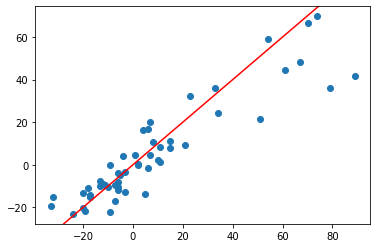

In [120]:
import matplotlib.pyplot as plt
plt.scatter(y_testmiss,y_pred)
plt.axline([0,0],[1,1],color='red')

In [121]:
pred = regr.predict(X_train.loc[X_train.DifGoles_1.isna(),['Valor','Valor_1','Delta_Valor','AvgValor_2','Position_1','VecesPrimera','AvgPosPrimera','RecienAsc',
             'Plantilla','Edad','Extranjeros']])
pred

array([-21.02, -20.41, -18.45, -18.02, -16.95, -19.46, -19.92, -20.72,
       -22.76, -23.18, -16.88, -23.6 , -21.51, -17.97, -24.82, -23.35,
       -21.21, -21.05, -21.47, -20.81, -17.67, -17.75, -24.01, -17.06,
       -18.08, -19.84, -19.57, -18.42, -22.64, -18.25])

In [122]:
X_train.loc[X_train.DifGoles_1.isna(),'DifGoles_1'] = pred 

In [123]:
X_train.isnull().sum()

Valor            0
Valor_1          0
Delta_Valor      0
AvgValor_2       0
Position_1       0
VecesPrimera     0
AvgPosPrimera    0
RecienAsc        0
DifGoles_1       0
Plantilla        0
Edad             0
Extranjeros      0
dtype: int64

In [124]:
pred2 = regr.predict(X_test.loc[X_test.DifGoles_1.isna(),['Valor','Valor_1','Delta_Valor','AvgValor_2','Position_1','VecesPrimera','AvgPosPrimera','RecienAsc',
             'Plantilla','Edad','Extranjeros']])
X_test.loc[X_test.DifGoles_1.isna(),'DifGoles_1'] = pred2 

#### Modelado 

In [126]:
X_train.shape

(210, 12)

In [127]:
y_train.value_counts()

0.0    182
1.0     28
Name: Descenso, dtype: int64

C:\Users\RZAMBR~1\AppData\Local\Temp/ipykernel_24044/717583292.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(correlation, dtype=np.bool)


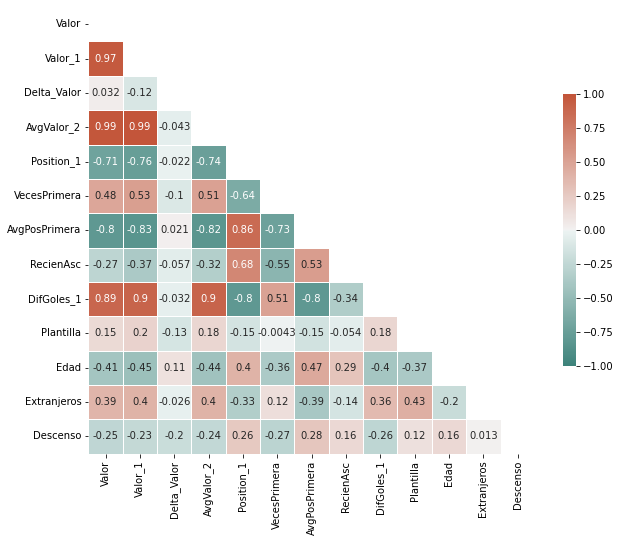

In [128]:
# Matriz de correlación
import seaborn as sns
import matplotlib.pyplot as plt

correlation = pd.concat([X_train,y_train],axis=1).corr()

mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(10, 10))

cmap = sns.diverging_palette(180, 20, as_cmap=True)
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=1, vmin =-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

<BarContainer object of 12 artists>

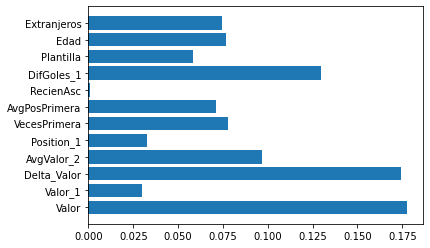

In [129]:
# Importancia de variables
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
plt.barh(X_train.columns, rf.feature_importances_)

In [133]:
# Balancear 
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_sm, y_sm = sm.fit_resample(X_train,y_train)

In [134]:
y_sm.value_counts()

0.0    182
1.0    182
Name: Descenso, dtype: int64

In [135]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(max_iter=1000)
logisticRegr.fit(X_sm.drop(columns=['Valor_1','AvgValor_2']),y_sm)

LogisticRegression(max_iter=1000)

In [136]:
y_pred = logisticRegr.predict(X_test.drop(columns=['Valor_1','AvgValor_2']))

In [137]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

         0.0       0.90      0.75      0.82        73
         1.0       0.38      0.65      0.48        17

    accuracy                           0.73        90
   macro avg       0.64      0.70      0.65        90
weighted avg       0.80      0.73      0.76        90



array([[55, 18],
       [ 6, 11]], dtype=int64)

In [138]:
y_test.value_counts()

0.0    73
1.0    17
Name: Descenso, dtype: int64

C:\Users\rzambrano\Anaconda3\envs\general\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


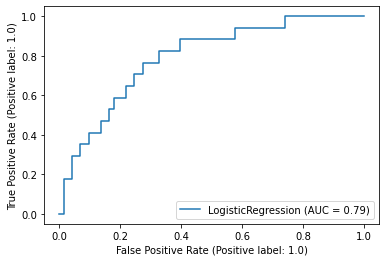

In [139]:
from sklearn import metrics
metrics.plot_roc_curve(logisticRegr, X_test.drop(columns=['Valor_1','AvgValor_2']),y_test)

In [140]:
datamodel

,Temporada,Equipo,Valor,Valor_1,Delta_Valor,AvgValor_2,Position_1,VecesPrimera,AvgPosPrimera,RecienAsc,DifGoles_1,Plantilla,Edad,Extranjeros,Descenso
0,2006.0,Real Madrid CF,0.833188,0.812046,0.026036,0.822617,2.0,1.0000,2.000000,0.0,30.0,39.0,24.9,15.0,0.0
0,2006.0,FC Barcelona,1.000000,1.000000,0.000000,1.000000,1.0,1.0000,1.000000,0.0,45.0,32.0,26.0,18.0,0.0
0,2006.0,Sevilla FC,0.385153,0.295950,0.301411,0.340551,5.0,1.0000,5.000000,0.0,15.0,32.0,25.9,15.0,0.0
0,2006.0,Valencia CF,0.615721,0.709242,-0.131861,0.662481,3.0,1.0000,3.000000,0.0,25.0,33.0,26.0,9.0,0.0
0,2006.0,Villarreal CF,0.317904,0.265836,0.195865,0.291870,7.0,1.0000,7.000000,0.0,11.0,30.0,26.8,16.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,2020.0,Deportivo Alavés,0.092047,0.104370,-0.118070,0.098208,16.0,0.3750,13.600000,0.0,-25.0,35.0,25.6,10.0,0.0
0,2020.0,Elche CF,0.044005,0.000000,0.000000,0.022002,21.0,0.1875,14.500000,1.0,NaN,42.0,26.7,14.0,0.0
0,2020.0,SD Huesca,0.076302,0.000000,0.000000,0.038151,21.0,0.1250,19.000000,1.0,NaN,34.0,26.5,8.0,1.0
0,2020.0,Real Valladolid CF,0.065402,0.085590,-0.235876,0.075496,13.0,0.5000,15.857143,0.0,-11.0,39.0,26.9,9.0,1.0


In [141]:
pred = regr.predict(datamodel.loc[datamodel.DifGoles_1.isna(),['Valor','Valor_1','Delta_Valor','AvgValor_2','Position_1','VecesPrimera','AvgPosPrimera','RecienAsc',
             'Plantilla','Edad','Extranjeros']])
pred

array([-19.05, -20.81, -18.36, -17.97, -18.42, -18.45, -17.67, -19.84,
       -18.25, -19.29, -18.95, -19.08, -17.17, -17.75, -23.6 , -18.02,
       -17.19, -20.41, -19.57, -22.76, -24.82, -17.06, -16.95, -23.35,
       -23.97, -19.46, -21.02, -22.64, -18.08, -19.16, -20.72, -21.21,
       -20.3 , -24.01, -23.55, -23.03, -16.88, -21.47, -23.18, -22.96,
       -19.92, -22.55, -21.05, -21.51, -17.44])

In [142]:
datamodel.loc[datamodel.DifGoles_1.isna(),'DifGoles_1'] = pred 

In [143]:
datamodel['Prob'] = logisticRegr.predict_proba(datamodel.drop(columns=['Temporada',
                                                                      'Equipo',
                                                                      'Valor_1',
                                                                      'AvgValor_2',
                                                                      'Descenso']))[:,1]


In [146]:
datamodel.loc[datamodel.Temporada==2020,['Temporada','Equipo','Descenso','Prob']].sort_values('Prob')

,Temporada,Equipo,Descenso,Prob
0,2020.0,FC Barcelona,0.0,0.001662
0,2020.0,Real Madrid CF,0.0,0.015780
0,2020.0,Sevilla FC,0.0,0.031035
0,2020.0,Villarreal CF,0.0,0.046014
0,2020.0,Atlético de Madrid,0.0,0.060240
0,2020.0,Athletic Club,0.0,0.087770
0,2020.0,Real Sociedad,0.0,0.128053
0,2020.0,CA Osasuna,0.0,0.137941
0,2020.0,Getafe CF,0.0,0.161831
0,2020.0,Granada CF,0.0,0.162396


Calcula la probabilidad de descenso para la temporada 2021/22

Transforma los scores del modelo a probabilidades reales

$$\LARGE P = \frac{P_{mod}\cdot (\frac{P_{desbal}}{P_{bal}})}{P_{mod}\cdot \frac{P_{desbal}}{P_{bal}}+(1-P_{mod})\cdot\frac{1-P_{desbal}}{1-P_{bal}}}$$
donde

$$P_{mod}= \text{Score del modelo}$$
$$P_{des}= \text{Ratio desbalance}$$
$$P_{bal}= 0.5$$

In [147]:
import pandas as pd
import numpy as np
import requests
import time # time.sleep(0.5)

clubes = pd.DataFrame()

url = 'https://www.transfermarkt.es/laliga/startseite/wettbewerb/ES1/plus/?saison_id=2021'

tables = pd.read_html(requests.get(url,
                               headers={'User-agent': 'Mozilla/5.0'}).text,
                  attrs={"class":"items"})
df = tables[0]
df

,Club,Club.1,name,Equipo,Edad,Extranjeros,ø-Valor de mercado,Valor de mercado total
0,NaN,Real Madrid CF,26.0,274,18,"30,00 mill. €","780,00 mill. €",NaN
1,NaN,FC Barcelona,30.0,255,15,"21,70 mill. €","651,00 mill. €",NaN
2,NaN,Atlético de Madrid,22.0,282,19,"29,39 mill. €","646,50 mill. €",NaN
3,NaN,Sevilla FC,26.0,280,19,"16,34 mill. €","424,90 mill. €",NaN
4,NaN,Real Sociedad,28.0,260,7,"14,12 mill. €","395,40 mill. €",NaN
5,NaN,Villarreal CF,26.0,278,12,"13,92 mill. €","362,00 mill. €",NaN
6,NaN,Valencia CF,25.0,245,17,"11,95 mill. €","298,80 mill. €",NaN
7,NaN,Real Betis Balompié,27.0,287,11,"8,52 mill. €","230,10 mill. €",NaN
8,NaN,Athletic Club,25.0,263,0,"7,62 mill. €","190,60 mill. €",NaN
9,NaN,Getafe CF,25.0,261,13,"6,01 mill. €","150,30 mill. €",NaN


In [148]:
clubes1 = df.iloc[:,[1,2,3,4,5]]
clubes1.columns = ['NaClub','Plantilla','Edad','Extranjeros','Valor']
clubes1 = clubes1.loc[~clubes1.Plantilla.isna()]

clubes1['ValorM'] = np.where(clubes1.Valor.str.contains('mil '),1000,1)
clubes1['Valor'] = clubes1.Valor.str.replace(',','.')
clubes1['Valor2'] = clubes1.Valor.str.extract('(^\d*.\d*)').astype('float')
clubes1['Valor2'] = clubes1['Valor2']/clubes1['ValorM']
clubes1['Edad'] = clubes1.Edad/10
clubes1['ValorRel'] = clubes1['Valor2']/clubes1['Valor2'].max()
clubes1['Temporada'] = 2021
clubes1

,NaClub,Plantilla,Edad,Extranjeros,Valor,ValorM,Valor2,ValorRel,Temporada
0,Real Madrid CF,26.0,27.4,18,30.00 mill. €,1,30.00,1.000000,2021
1,FC Barcelona,30.0,25.5,15,21.70 mill. €,1,21.70,0.723333,2021
2,Atlético de Madrid,22.0,28.2,19,29.39 mill. €,1,29.39,0.979667,2021
3,Sevilla FC,26.0,28.0,19,16.34 mill. €,1,16.34,0.544667,2021
4,Real Sociedad,28.0,26.0,7,14.12 mill. €,1,14.12,0.470667,2021
5,Villarreal CF,26.0,27.8,12,13.92 mill. €,1,13.92,0.464000,2021
6,Valencia CF,25.0,24.5,17,11.95 mill. €,1,11.95,0.398333,2021
7,Real Betis Balompié,27.0,28.7,11,8.52 mill. €,1,8.52,0.284000,2021
8,Athletic Club,25.0,26.3,0,7.62 mill. €,1,7.62,0.254000,2021
9,Getafe CF,25.0,26.1,13,6.01 mill. €,1,6.01,0.200333,2021


In [149]:
datapred = pd.DataFrame(columns=['Temporada','Equipo','Valor','Valor_1','Delta_Valor','AvgValor_2',
                                  'Position_1',
                                 'VecesPrimera','AvgPosPrimera','RecienAsc',
                                 'DifGoles_1',
                                 'Plantilla','Edad','Extranjeros'])

for index,row in clubes1.iterrows():
    Temporada = 2021
    Equipo = row.NaClub
    Valor = row.ValorRel
    try: Valor_1 = primera.loc[(primera['Club.1']==row['NaClub']) & (primera['Temporada']==row.Temporada-1)].ValorRel.values[0]
    except: Valor_1 = 0
    AvgValor_2 = np.mean([Valor,Valor_1])
    try: Delta_Valor = (Valor-Valor_1)/Valor_1
    except: Delta_Valor = 0
    try: Position_1 = primera.loc[(primera['Club.1']==row['NaClub']) & (primera['Temporada']==row.Temporada-1)]['#'].values[0]
    except: Position_1 = 21
    VecesPrimera = primera.loc[(primera['Club.1']==row['NaClub']) & (primera['Temporada']<=row.Temporada)].shape[0]/primera.loc[primera.Temporada<=row.Temporada]['Temporada'].nunique()
    AvgPosPrimera = primera.loc[(primera['Club.1']==row['NaClub']) & (primera['Temporada']<row.Temporada)]['#'].mean()
    if np.isnan(AvgPosPrimera): AvgPosPrimera = 21
    RecienAsc = np.where(primera.loc[(primera['Club.1']==row['NaClub']) & (primera['Temporada']==row.Temporada-1)].shape[0]==0, 1, 0)
    try: DifGoles_1 = primera.loc[(primera['Club.1']==row['NaClub']) & (primera['Temporada']==row.Temporada-1)]['+/-'].values[0]
    except: DifGoles_1 = np.nan
    Plantilla = row.Plantilla
    Edad = row.Edad
    Extranjeros = row.Extranjeros
    

    dfrow = pd.DataFrame({

    'Temporada':[Temporada],
    'Equipo':[Equipo],
    'Valor':[Valor],
    'Valor_1':[Valor_1],
    'Delta_Valor':[Delta_Valor],
    'AvgValor_2':[AvgValor_2],
    'Position_1':[Position_1],
    'VecesPrimera':[VecesPrimera],
    'AvgPosPrimera':[AvgPosPrimera],
    'RecienAsc':[RecienAsc],
    'DifGoles_1':[DifGoles_1],
    'Plantilla':[Plantilla],
    'Edad':[Edad],
    'Extranjeros':[Extranjeros],
    'Descenso':[Descenso]
    })

    datapred = pd.concat([datapred,dfrow])

In [150]:
datapred

,Temporada,Equipo,Valor,Valor_1,Delta_Valor,AvgValor_2,Position_1,VecesPrimera,AvgPosPrimera,RecienAsc,DifGoles_1,Plantilla,Edad,Extranjeros,Descenso
0,2021,Real Madrid CF,1.000000,0.859104,0.164004,0.929552,2,1.0000,1.875000,0,39,26.0,27.4,18,1.0
0,2021,FC Barcelona,0.723333,1.000000,-0.276667,0.861667,3,1.0000,1.562500,0,47,30.0,25.5,15,1.0
0,2021,Atlético de Madrid,0.979667,0.800161,0.224336,0.889914,1,1.0000,4.187500,0,42,22.0,28.2,19,1.0
0,2021,Sevilla FC,0.544667,0.444489,0.225376,0.494578,4,1.0000,5.312500,0,20,26.0,28.0,19,1.0
0,2021,Real Sociedad,0.470667,0.431974,0.089571,0.451320,5,0.8125,10.153846,0,21,28.0,26.0,7,1.0
0,2021,Villarreal CF,0.464000,0.328220,0.413688,0.396110,7,0.9375,6.666667,0,16,26.0,27.8,12,1.0
0,2021,Valencia CF,0.398333,0.321760,0.237982,0.360047,13,1.0000,6.437500,0,-3,25.0,24.5,17,1.0
0,2021,Real Betis Balompié,0.284000,0.253936,0.118391,0.268968,6,0.8125,12.538462,0,0,27.0,28.7,11,1.0
0,2021,Athletic Club,0.254000,0.257570,-0.013859,0.255785,9,1.0000,9.750000,0,4,25.0,26.3,0,1.0
0,2021,Getafe CF,0.200333,0.207913,-0.036455,0.204123,15,0.9375,11.666667,0,-15,25.0,26.1,13,1.0


In [151]:
# Predecir missings en DiffGoles_1
pred = regr.predict(datapred.loc[datapred.DifGoles_1.isna(),['Valor','Valor_1','Delta_Valor','AvgValor_2','Position_1','VecesPrimera','AvgPosPrimera','RecienAsc',
             'Plantilla','Edad','Extranjeros']])
datapred.loc[datapred.DifGoles_1.isna(),'DifGoles_1'] = pred 
datapred

,Temporada,Equipo,Valor,Valor_1,Delta_Valor,AvgValor_2,Position_1,VecesPrimera,AvgPosPrimera,RecienAsc,DifGoles_1,Plantilla,Edad,Extranjeros,Descenso
0,2021,Real Madrid CF,1.000000,0.859104,0.164004,0.929552,2,1.0000,1.875000,0,39,26.0,27.4,18,1.0
0,2021,FC Barcelona,0.723333,1.000000,-0.276667,0.861667,3,1.0000,1.562500,0,47,30.0,25.5,15,1.0
0,2021,Atlético de Madrid,0.979667,0.800161,0.224336,0.889914,1,1.0000,4.187500,0,42,22.0,28.2,19,1.0
0,2021,Sevilla FC,0.544667,0.444489,0.225376,0.494578,4,1.0000,5.312500,0,20,26.0,28.0,19,1.0
0,2021,Real Sociedad,0.470667,0.431974,0.089571,0.451320,5,0.8125,10.153846,0,21,28.0,26.0,7,1.0
0,2021,Villarreal CF,0.464000,0.328220,0.413688,0.396110,7,0.9375,6.666667,0,16,26.0,27.8,12,1.0
0,2021,Valencia CF,0.398333,0.321760,0.237982,0.360047,13,1.0000,6.437500,0,-3,25.0,24.5,17,1.0
0,2021,Real Betis Balompié,0.284000,0.253936,0.118391,0.268968,6,0.8125,12.538462,0,0,27.0,28.7,11,1.0
0,2021,Athletic Club,0.254000,0.257570,-0.013859,0.255785,9,1.0000,9.750000,0,4,25.0,26.3,0,1.0
0,2021,Getafe CF,0.200333,0.207913,-0.036455,0.204123,15,0.9375,11.666667,0,-15,25.0,26.1,13,1.0


In [152]:
cols = X_sm.drop(columns=['Valor_1','AvgValor_2']).columns.tolist()
cols

['Valor',
 'Delta_Valor',
 'Position_1',
 'VecesPrimera',
 'AvgPosPrimera',
 'RecienAsc',
 'DifGoles_1',
 'Plantilla',
 'Edad',
 'Extranjeros']

In [153]:
datapred['Pred'] = logisticRegr.predict_proba(datapred[cols])[:,1]

In [154]:
datapred

,Temporada,Equipo,Valor,Valor_1,Delta_Valor,AvgValor_2,Position_1,VecesPrimera,AvgPosPrimera,RecienAsc,DifGoles_1,Plantilla,Edad,Extranjeros,Descenso,Pred
0,2021,Real Madrid CF,1.000000,0.859104,0.164004,0.929552,2,1.0000,1.875000,0,39,26.0,27.4,18,1.0,0.003138
0,2021,FC Barcelona,0.723333,1.000000,-0.276667,0.861667,3,1.0000,1.562500,0,47,30.0,25.5,15,1.0,0.007967
0,2021,Atlético de Madrid,0.979667,0.800161,0.224336,0.889914,1,1.0000,4.187500,0,42,22.0,28.2,19,1.0,0.002016
0,2021,Sevilla FC,0.544667,0.444489,0.225376,0.494578,4,1.0000,5.312500,0,20,26.0,28.0,19,1.0,0.020553
0,2021,Real Sociedad,0.470667,0.431974,0.089571,0.451320,5,0.8125,10.153846,0,21,28.0,26.0,7,1.0,0.030838
0,2021,Villarreal CF,0.464000,0.328220,0.413688,0.396110,7,0.9375,6.666667,0,16,26.0,27.8,12,1.0,0.012161
0,2021,Valencia CF,0.398333,0.321760,0.237982,0.360047,13,1.0000,6.437500,0,-3,25.0,24.5,17,1.0,0.015034
0,2021,Real Betis Balompié,0.284000,0.253936,0.118391,0.268968,6,0.8125,12.538462,0,0,27.0,28.7,11,1.0,0.264344
0,2021,Athletic Club,0.254000,0.257570,-0.013859,0.255785,9,1.0000,9.750000,0,4,25.0,26.3,0,1.0,0.053050
0,2021,Getafe CF,0.200333,0.207913,-0.036455,0.204123,15,0.9375,11.666667,0,-15,25.0,26.1,13,1.0,0.171040


In [156]:
def ajustar_prob(pdesb,pbal,pmod):
    num = pmod*(pdesb/pbal)
    den = pmod * (pdesb/pbal) + (1-pmod)*((1-pdesb)/(1-pbal))
    return num/den

In [157]:
probs = []
for pred in datapred.Pred:
    probs.append(ajustar_prob(3/20,0.5,pred))
probs

[0.0005552572292657786,
 0.0014152204630828522,
 0.00035637872691106495,
 0.00368949385003644,
 0.0055837612913941,
 0.002167713844831634,
 0.0026863150220883623,
 0.059630042781104085,
 0.009789369530109535,
 0.03513209493325274,
 0.012663487952986534,
 0.029454864684330406,
 0.04485741070880408,
 0.17515569545397836,
 0.40640338002405574,
 0.10633398343389935,
 0.1429722392506566,
 0.12525727243571522,
 0.09787791805176525,
 0.06485250572441839]

In [158]:
datapred['Probabilidad'] = probs

In [159]:
datapred[['Equipo','Pred','Probabilidad']].sort_values('Probabilidad')

,Equipo,Pred,Probabilidad
0,Atlético de Madrid,0.002016,0.000356
0,Real Madrid CF,0.003138,0.000555
0,FC Barcelona,0.007967,0.001415
0,Villarreal CF,0.012161,0.002168
0,Valencia CF,0.015034,0.002686
0,Sevilla FC,0.020553,0.003689
0,Real Sociedad,0.030838,0.005584
0,Athletic Club,0.053050,0.009789
0,RC Celta de Vigo,0.067756,0.012663
0,RCD Espanyol,0.146741,0.029455


### 2. Modelo de ascenso 

Utilizando el mismo dataset anterior, genera un dataframe que indique, para cada equipo descendido, cuánto tiempo tardó en volver a primera división (si es que volvió). Por ejemplo, el Rayo Vallecano desdenció en la temporada 2015-16 y volvió a Primera en la temporada 2018-19 (pasó dos años en "el infierno") 

In [160]:
primera

,#,Club.1,Partidos,G,E,P,Goles,+/-,Pto.,Temporada,NaClub,Plantilla,Edad,Extranjeros,Valor,ValorM,Valor2,VMax,ValorRel
0,1,FC Barcelona,38,25,7,6,80:35,45,82,2005,FC Barcelona,34.0,24.9,15,9.63 mill. €,1,9.63,9.63,1.000000
1,2,Real Madrid CF,38,20,10,8,70:40,30,70,2005,Real Madrid CF,36.0,25.0,13,7.82 mill. €,1,7.82,9.63,0.812046
2,3,Valencia CF,38,19,12,7,58:33,25,69,2005,Valencia CF,31.0,27.2,14,6.83 mill. €,1,6.83,9.63,0.709242
3,4,CA Osasuna,38,21,5,12,49:43,6,68,2005,CA Osasuna,25.0,26.0,7,1.63 mill. €,1,1.63,9.63,0.169263
4,5,Sevilla FC,38,20,8,10,54:39,15,68,2005,Sevilla FC,34.0,25.5,11,2.85 mill. €,1,2.85,9.63,0.295950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,16,Deportivo Alavés,38,9,11,18,36:57,-21,38,2020,Deportivo Alavés,35.0,25.6,10,2.28 mill. €,1,2.28,24.77,0.092047
316,17,Elche CF,38,8,12,18,34:55,-21,36,2020,Elche CF,42.0,26.7,14,1.09 mill. €,1,1.09,24.77,0.044005
317,18,SD Huesca,38,7,13,18,34:53,-19,34,2020,SD Huesca,34.0,26.5,8,1.89 mill. €,1,1.89,24.77,0.076302
318,19,Real Valladolid CF,38,5,16,17,34:57,-23,31,2020,Real Valladolid CF,39.0,26.9,9,1.62 mill. €,1,1.62,24.77,0.065402


Dibuja la curva de probabilidad de ascenso en función de los años que un equipo pase en segunda división

In [ ]:
# Probabilidad de estar un año en 2º


In [ ]:
# Probabilidad de estar dos años en 2º


In [ ]:
# Probabilidad de estar tres años en 2º


In [ ]:
# Probabilidad de estar cuatro años en 2º


In [ ]:
# Probabilidad de estar cinco años en 2º


In [ ]:
# Probabilidad de estar seis años en 2º
